# Maching Learning - Logistic Regression

CS440/640


<br>      This code is about how to implement Logistic Regression                                                                      



In [1]:
# Import Python libraries
import numpy as np    # numpy is the fundamental package for scientific computing with Python, such linear algebra, array...
import matplotlib.pyplot as plt      # matplotlib is a Python 2D plotting library which produces publication quality figures.

## Logistic Regression Model 


In [236]:
class LogisticRegression:
    """
    This lab implements a Logistic Regression Classifier.
    """
    def show_theta(self):
        return self.theta
    
    def __init__(self, input_dim, output_dim, inner):
        """
        Initializes the parameters of the logistic regression classifer to 
        random values.
        
        args:
            input_dim: Number of dimensions of the input data
            output_dim: Number of classes
        """
        self.inner = inner
        self.theta01 = np.random.randn(input_dim, inner) / np.sqrt(input_dim)
        self.theta12 = np.random.randn(inner, output_dim) / np.sqrt(input_dim)
        self.bias01 = np.zeros((1, inner))
        self.bias12 = np.zeros((1, output_dim))
        
    #--------------------------------------------------------------------------
    
    def compute_cost(self,X, y):
        """
        Computes the total cost on the dataset.
        
        args:
            X: Data array
            y: Labels corresponding to input data
        
        returns:
            cost: average cost per data sample
        """
        num_examples = np.shape(X)[0]
        z = np.dot(X,self.theta01) + self.bias01
        print("Z\n")
        print(z)
        exp_z = np.exp(z)
        softmax_scores = exp_z / np.sum(exp_z, axis=1, keepdims=True)
        
        one_hot_y = np.zeros((num_examples,np.max(y)+1))
        logloss = np.zeros((num_examples,))        
        for i in range(np.shape(X)[0]):
            one_hot_y[i,y[i]] = 1
            logloss[i] = -np.sum(np.log(softmax_scores[i,:]) * one_hot_y[i,:])
        data_loss = np.sum(logloss)
        print("softmax\n")
        print(softmax_scores)
        print("onehot_y\n")
        print(one_hot_y)
        print("logloss\n")
        print(logloss)
        return 1./num_examples * data_loss

    
    #--------------------------------------------------------------------------
 
    def predict(self,X):
        """
        Makes a prediction based on current model parameters.
        
        args:
            X: Data array
            
        returns:
            predictions: array of predicted labels
        """
        
        # Forward propagation
        z01 = np.dot(X,self.theta01) + self.bias01
        X1 = activation_func(z01)
            
        z12 = np.dot(X1,self.theta12) + self.bias12
            
        exp_z = np.exp(z12)

        softmax_scores = exp_z / (exp_z + 1)
            
        predictions = np.argmax(softmax_scores, axis = 1)
        return predictions
        
    #--------------------------------------------------------------------------
    # implement logistic regression using gradient descent 
    #--------------------------------------------------------------------------
    def fit(self,X,y,num_epochs,alpha=0.01):
    
        #Learns model parameters to fit the data.
  

        for epoch in range(0, num_epochs):

            # Forward propagation
            z01 = np.dot(X,self.theta01) + self.bias01
            X1 = activation_func(z01)
            
            z12 = np.dot(X1,self.theta12) + self.bias12
            exp_z = np.exp(z12)
            #softmax_scores = exp_z / np.sum(exp_z, axis=1, keepdims=True)
            softmax_scores = exp_z / (exp_z + 1)
        
        
        
            # Backpropagation
            beta2 = np.zeros_like(softmax_scores)
            one_hot_y2 = np.zeros_like(softmax_scores)
            for i in range(X.shape[0]):
                one_hot_y2[i,y[i]] = 1
            beta2 = softmax_scores - one_hot_y2

            # Compute gradients of model parameters
            dtheta2 = np.dot(X1.T,beta2)

            dbias2 = np.sum(beta2, axis=0)
            oldtheta12 = self.theta12.copy()
            oldbias12 = self.bias12.copy()
    
            # Gradient descent parameter update ----- 2 to 1
            self.theta12 -= alpha * dtheta2
            self.bias12 -= alpha * dbias2

            beta1 = np.zeros_like(beta2)

            delta2 = np.dot(beta2,oldtheta12.T)*(1-X1*X1)
            
            dtheta1 = np.dot(X.T,delta2)
            dbias1 = np.sum(delta2,axis=0)
            
            self.theta01 -= alpha * dtheta1
            self.bias01 -= alpha * dbias1
            
        return 0

In [216]:
def plot_decision_boundary(model, X, y):
    """
    Function to print the decision boundary given by model.
    
    args:
        model: model, whose parameters are used to plot the decision boundary.
        X: input data
        y: input labels
    """
    
    x1_array, x2_array = np.meshgrid(np.arange(-10, 10, 0.01), np.arange(-10, 10, 0.01))
    grid_coordinates = np.c_[x1_array.ravel(), x2_array.ravel()]
    Z = model.predict(grid_coordinates)
    Z = Z.reshape(x1_array.shape)
    plt.contourf(x1_array, x2_array, Z, cmap=plt.cm.bwr)
#     plt.contourf(Z, cmap=plt.cm.bwr)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr)
    plt.show()

In [317]:
'''
activation function for hidden layer : tanh, ReLU
'''
def activation_func(x):
    return np.tanh(x)
def reLU(x):
    return np.maximum(0,x)

## Data Analysis Basics

In [237]:
#1. Load data
X = np.genfromtxt('DATA/data_LinearX.csv', delimiter=',') #https://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html
y = np.genfromtxt('DATA/data_LinearY.csv', delimiter=',').astype(np.int64)

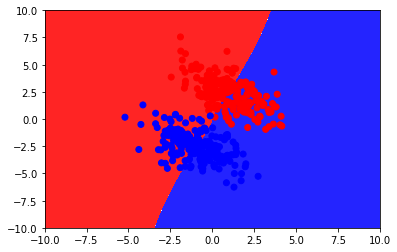

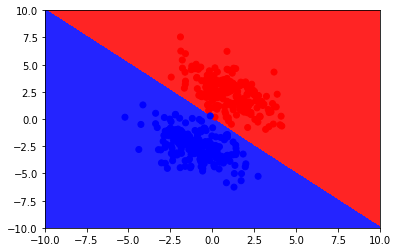

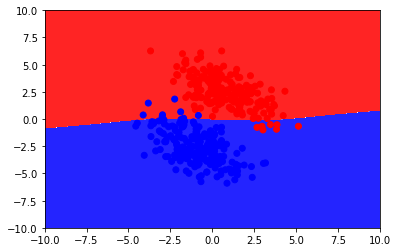

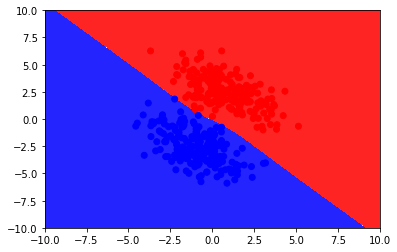

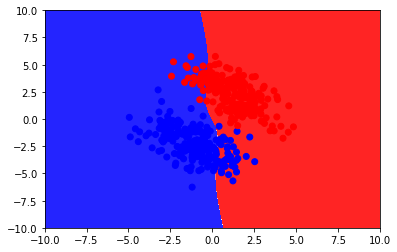

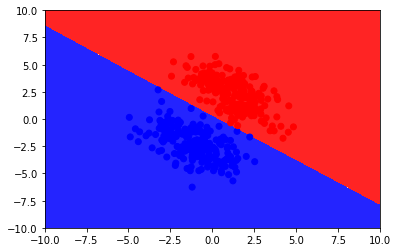

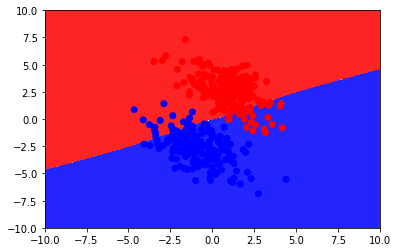

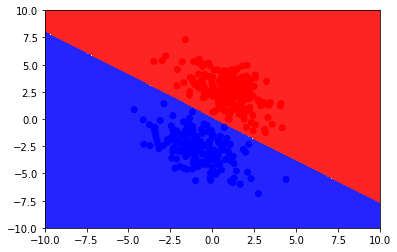

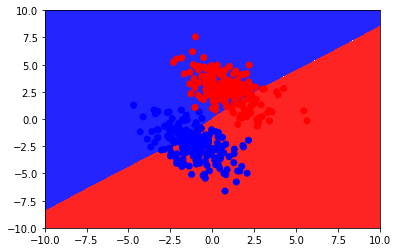

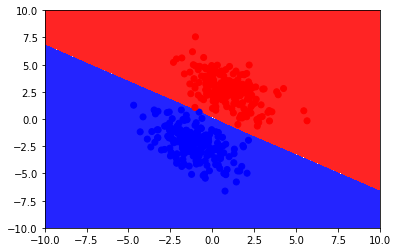

ACCURACY:  1.0025062656641603
CONFUSION MATRIX: 
 [[200.   0.]
 [  0. 200.]]


In [324]:
# 5-fold round robin cross validation here.
X_split = np.split(X,5)
y_split = np.split(y,5)
counts = 0
total_con_mat = np.zeros((output_dim,output_dim))
for i in range(0,5):
    X_test = X_split[i]
    y_test = y_split[i]
    X_train = np.delete(X_split, i, 0)
    y_train = np.delete(y_split, i, 0)
    tempX=X_train[0]
    tempY=y_train[0]
    for j in range(1,4):
        tempX = np.vstack((tempX,X_train[j]))
        tempY = np.append(tempY, y_train[j])
      
    input_dim = np.shape(tempX)[1]
    output_dim = np.max(tempY) + 1
    logregTemp = LogisticRegression(input_dim, output_dim,15)
    plot_decision_boundary(logregTemp, X_test, y_test)
    logregTemp.fit(X_test,y_test,1000,alpha=0.001)
    plot_decision_boundary(logregTemp, X_test, y_test)
    

    y_pred = logregTemp.predict(X_test)
    con_mat = np.zeros((output_dim, output_dim))
    acc
    for i in range(len(y_pred)):
        con_mat[y_pred[i], y_test[i]] += 1
        if y_test[i] == y_pred[i]:
            acc += 1
    acc = acc/len(y_pred)
    counts += acc
    total_con_mat += con_mat
print ('ACCURACY: ', counts/5)
print ('CONFUSION MATRIX: \n', total_con_mat/5)
    
    
    
        

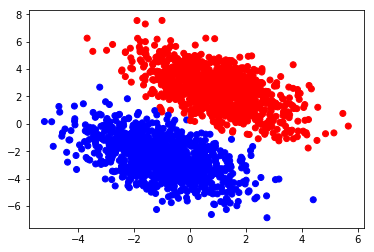

In [238]:
#2. plot data
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.bwr) #http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter
plt.show()

In [239]:
#3. Initialize model
input_dim = np.shape(X)[1]
output_dim = np.max(y) + 1
logreg = LogisticRegression(input_dim, output_dim,15)


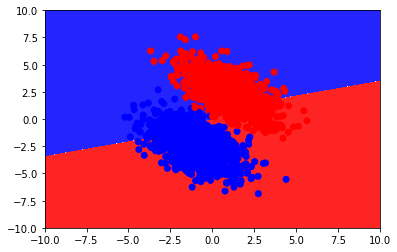

In [240]:
#4. Plot decision boundary
plot_decision_boundary(logreg, X, y)

## Train Classification Model
**Classification** tries to predict, which of a small set of classes, a sample in a population belongs to. Mathematically, the aim is to find $y$, a **label** based on knowing a feature vector $X$.

In [241]:
#5. Train the model
logreg.fit(X,y,1000,alpha=0.001)

0

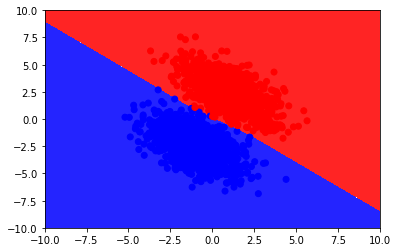

In [243]:
#6. Plot decision boundary after trainning
plot_decision_boundary(logreg, X, y)

### Non-linear Case

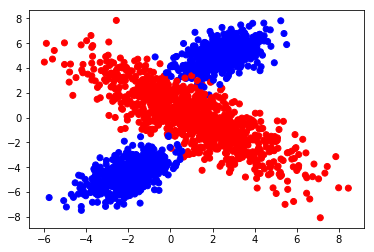

In [249]:
#1. Load data
X_non = np.genfromtxt('DATA/data_nonLinearX.csv', delimiter=',') #https://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html
y_non = np.genfromtxt('DATA/data_nonLinearY.csv', delimiter=',').astype(np.int64)
#2. plot data
plt.scatter(X_non[:,0], X_non[:,1], c=y_non, cmap=plt.cm.bwr) #http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter
plt.show()

In [250]:
#3. Initialize model
input_dim = np.shape(X_non)[1]
output_dim = np.max(y_non) + 1
logreg = LogisticRegression(input_dim, output_dim,15)

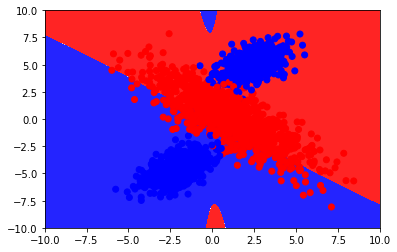

In [251]:
#4. Plot decision boundary
plot_decision_boundary(logreg, X_non, y_non)

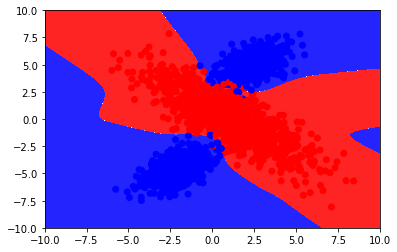

In [252]:
#5. Train the model
logreg.fit(X_non,y_non,1000,alpha=0.001)
#6. Plot decision boundary after trainning
plot_decision_boundary(logreg, X_non, y_non)

In [255]:
#7. ompute accuracy and confusion matrix
acc = 0
y_pred = logreg.predict(X_non)
con_mat = np.zeros((output_dim, output_dim))
for i in range(len(y_pred)):
    con_mat[y_pred[i], y_non[i]] += 1
    if y_non[i] == y_pred[i]:
        acc += 1
acc = acc/len(y_pred)
print ('ACCURACY: ', acc)
print ('CONFUSION MATRIX: \n', con_mat)

ACCURACY:  0.9915
CONFUSION MATRIX: 
 [[992.   9.]
 [  8. 991.]]


## Model Evaluation

In [253]:
#7. ompute accuracy and confusion matrix
acc = 0
y_pred = logreg.predict(X)
con_mat = np.zeros((output_dim, output_dim))
for i in range(len(y_pred)):
    con_mat[y_pred[i], y[i]] += 1
    if y[i] == y_pred[i]:
        acc += 1
acc = acc/len(y_pred)
print ('ACCURACY: ', acc)
print ('CONFUSION MATRIX: \n', con_mat)

ACCURACY:  0.676
CONFUSION MATRIX: 
 [[663. 311.]
 [337. 689.]]
